# 07 __Unsupervised Learning__

In machine learning, the problem of unservised learning is that of
trying to find hidden structure in unlabeled data. Since the examples
fuven to the learner are unlabeled, there is no error or reward signal
to evaluate the goodness of a potential solution. This distinguishes unsupervised
from supervised learning.
__Unsupervised learning is defines as the task performed by algorithms
that learn from a training set of unlabeled or unannotated examples, 
using the features of the inputs to categorize them according to some
geometric or statistical criteria.__

Unsupervised learning encompasses many techniques that seek to summarize and
explain key features or structures of the data. Many methods employed in unsuper-
vised learning are based on data mining methods used to preprocess data. Most
unsupervised learning techniques can be summarized as those that tackle the follow-
ing four groups of problems:
1. __Clustering__: has a goal to partition the set of examples into groups.
2. __Dimensionality reduction__: aims to reduce the dimensionality of the data.
    Here we encounter techniques such as PCA, independendent component analysis,
    and nonnegative matrix factorization.
3. __Outlier detection__: has a purpose to find unusual events (e.g. malfunction)
    that distinguish part of the dat afrom the rest according to certain criteria.
4. __Novelty detection__: deals with cases when changes occur in the data
    (e.g. in steaming data).



## __Clustering__

Clustering is a process of grouping similar objects together, i.e., to aprtition
unlabeled examples into disjoint subsets of clusters, such that:
+ Examples withing a clsuter are similar (_high interclass similarity_)
+ Exampples in different clusters are different (_low interclass similarity_)

When we denote data as similar and dissimilat, we should define a measure for this
similarity/dissimilarity. Note that grouping similar data together can help
in discovering enw categories in an unsupervised manner, even when no sample category
lavels are provided. Moreover, two kidns of inputs can be used for grouping:
+ in __similarity-based clustering__, the input to the algorithm is an _n_ $\times$ _n_ 
    __dissimilarity matrix__ or __distance matrix__.
+ in __feature-based clustering__, the input to the algorithm is an _n_ $\times$ _D_
    __feature matrix__ or __design matrix__, where _n_ is the number of examples in the
    dataset and _D_ the dimensionality of each example.

Similarity-based clustering allows easy inclusion of domain-specific similarity,
while feature-based clsutering has the advantage that it is applicable to potentially noisy
data.
Therefore, several questions regarding the clustering process arise.


* What is a natural grouping among the objects? We need to define the "groupness"
    and the "similarity/distance" between data.
* How can we group samples? What are the best procedures? Are they efficient?
    Are they fast? Are they deterministic?
* How many clusters should we look for in the data? Shall we state his number
    _a priori_? Should the process be completely data driven or can the user
    guide the grouping process? How can we avoid "trivial" clusters? Should we allow
    final clustering results to ahve very large or very small clusters?
    Which methods work when the number of samples is large? Which methods work when
    the number of classes is large?
* What constitutes a good grouping? What objective measures can be defined to
    evaluate the quality of the clusters?

There is not always a single or optimal answer to these questions. It used to be said
that clustering is a “subjective” issue. Clustering will help us to describe, analyze,
and gain insight into the data, but the quality of the partition depends to a great extent
on the application and the analyst.

## __Similarity and Distances__

To speak of similar and dissimilar data, we need to introduce a notion of the similarity
of data. There are several ways for modeling of similarity. A simple way to model
this is by means of a Gaussian kernel:

$$ s(a, b) = e^{-\gamma d(a, b)} $$

where $d(a, b)$ is a metric function, and $\gamma$ is a constant that controls the decay
of the function. Observe that when $a =b$, the similarity is maximum and equal to one.
On the contrary, when $a$ is very different to $b$, the similarity tends to zero.

The former modeling of the similarity function suggests that we can use the notion of
distance as a surrogate. The most widespread distance metric is the _Minkowski distance__:

$$ d(a, b) = \big( \sum_{i = 1}^{d} | a_i - b_i |^p \big)^{1 / p}$$

where $d(a, b)$ stands for the distance between two elements $a, b \in \mathbb{R}^d $, $d$ is the
dimensionality of the data, and $p$ is a parameter.

The best-known instantiations of this metric are as follows:

* when $p = 2$, we have the _Euclidean distance_
* when $p = 1$, we have the _Manhattan distance_
* when $p = \infty$ we have the _max-distance_. In this case the distance
    corresponds to the component $|a_b - b_i |$ with the highest value.

## __Metrics to Measure Clustering Quality__

When performing clustering, the question normally arises: How do we measure the
quality of the clustering result? Note that in unsupervised clustering, we do not have
groundtruth labels that would allow us to compute the accuracy of the algorithm. Still,
there are several procedures for assessing quality. We find two families of techniques:
those that allow us to __compare clustering techniques__, and those that __check on specific
properties of the clustering__, for example “compactness”.

### __Rand Index, Homogeneity, Completeness and V-measure Scores__

One of the best-known methods for comparing the results in clustering techniques
in statistics is the Rand index or Rand measure (named after William M. Rand). The
Rand index evaluates the similarity between two results of data clustering. Since
in unsupervised clustering, class labels are not known, we use the Rand index to
compare the coincidence of different clusterings obtained by different approaches
or criteria. As an alternative, we later discuss the Silhouette coefficient: instead of
comparing different clusterings, this evaluates the compactness of the results of
applying a specific clustering approach.

Given a set of $n$ elements $S = \{o_1, ..., o_n\}$, we can compare two partitions of $S$:
$X = \{X_1, ..., X_r\}$, a partition of $S$ into $r$ subsets; and $Y = \{Y_1, ..., Y_s\}$, 
a partition of $S$ into $s$ subsets. Let us use the annotations as follows:

* $a$ is the number of pairs of elements in $S$ that are in the same subset in both
    $X$ and $Y$;
* $b$ is the number of pairs of elements on $S$ that are in different subsets in both
    $X$ and $Y$
* $c$ is the number of pairs of elements in $S$ that are in the same subset in $X$, but in
    different subsets in $Y$; and
* $d$ is the number of pairs of elements in $S$ that are in different subsets in $X$, but
    in the same subset in $Y$.
    
The Rand index, $R$ is defines as:

$$ R = \frac{a + b}{a + b + c + d} $$

ensuring that its value is between 0 and 1.

One of the problems of the Rand index is that when given two datasets with random
labelings, it does not take a constant value (e.g., zero) as expected. Moreover, when
the number of clusters increases it is desirable that the upper limit tends to the unity.
To solve this problem, a form of the Rand index, called the Adjusted Rand index, is
used that adjusts the Rand index with respect to chance grouping of elements. It is
defined as follows:

$$ AR = \frac{\binom{n}{2} (a + d) - [(a + b)(a + c) + (c + d)(b + d)]}{\binom{n}{2}^2[a(a + b)(a + c) + (c + d)(b + d)]} $$

Another way for comparing clustering results is the __V-measure__. Let us first
introduce some concepts. 

We say that a clustering result satisfies a _homogeneity_
criterion if all of its clusters contain only data points which are members of the
same original (single) class.

A clusterign result satisfies a _completeness__ criterion if all the data points
that are members of a given class are elements of the same predicted cluster.

Note that both scores have real positive values between 0.0 and 1.0, larger values
being desireble.


In [8]:
# for example if we consider two toy clustering sets
# (e.g. orgiinal and predicted) with four samples and two
# labels we get
from sklearn import metrics
print(f'{metrics.homogeneity_score([0, 0, 1, 1],[0, 0, 0, 0]):.3f}')
# the homogeinity is 0 since the sample sin the predicted cluster 0 come from
# original cluster 0 and cluster 1

0.000


In [9]:
print(f'{metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0])}')
# the completeness is 1 dince all the samples from the original
# cluster with label 0 go into the same predicted cluster
# with label 1 and all the samples from the original cluster with
# label 1 go into the same prdeicted clsiter with label 0

1.0


However, how can we define a measure that takes into account the completeness
as well as the homogeneity? The V-measure is the harmonic mean between the
homogeneity and the completeness defined as follows:homo

$$ v = 2 * (homogeinity * completeness) / (homogeinity + completeness) $$

Note that this metric is not dependent of the absolute values of the labels: a
permutation of the class or cluster label values will not change the score value in
any way. Moreover, the metric is symmetric with respect to switching between the
predicted and the original cluster label. This is very useful to measure the agreement
of two independent label assignment strategies applied to the same dataset even
when the real groundtruth is not known. If class members are completely split across
different clusters, the assignment is totally incomplete, hence the V-measure is null:

In [10]:
print(f'{metrics.v_measure_score([0, 0, 0, 0], [0, 1, 2, 3])}')

0.0


In contrast, clusters that include samples from different classes destroy the homo-
geneity of the labeling, hence:


In [11]:
print(f'{metrics.v_measure_score([0, 0, 1, 1], [0, 0, 0, 0])}')

3.203426503814917e-16


In summary, we can say that the advantages of the V-measure include that it
has bounded scores: 0.0 means the clustering is extremely bad; 1.0 indicates a perfect clustering result. Moreover, it can be interpreted easily: when analyzing the
V-measure, low completeness or homogeneity explain in which direction the clustering is not performing well. Furthermore, we do not assume anything about the
cluster structure. Therefore, it can be used to compare clustering algorithms such
as K-means, which assume isotropic blob shapes, with results of other clustering
algorithms such as spectral clustering which can find clusters
with “folded” shapes. As a drawback, the previously introduced metrics are not
normalized with regard to random labeling. This means that depending on the number of samples, clusters and groundtruth classes, a completely random labeling will
not always yield the same values for homogeneity, completeness and hence, the V-measure. In particular, random labeling will not yield a zero score, and they will tend
further from zero as the number of clusters increases. It can be shown that this problem can reliably be overcome when the number of samples is high, i.e., more than a
thousand, and the number of clusters is less than 10. These metrics require knowledge of the groundtruth classes, while in practice this information is almost never
available or requires manual assignment by human annotators. Instead, as mentioned
before, these metrics can be used to compare the results of different clusterings.

## __Silhouette Score__

An alternative to the former scores is to evaluate the final ‘shape’ of the clustering
result. This is the underlying idea behind the Silhouette coefficient. It is defined as
a function of the intracluster distance of a sample in the dataset, a and the nearest-
cluster distance, b for each sample. Later, we will discuss different ways to compute
the distance between clusters. The Silhouette coefficient for a sample i can be written
as follows:

$$ Silhoutette(i) = \frac{b - a}{\max(a, b)} $$

Hence, if the Silhouette s(i) is close to 0, it means that the sample is on the border of
its cluster and the closest one from the rest of the dataset clusters. A negative value
means that the sample is closer to the neighbor cluster. The average of the Silhouette
coefficients of all samples of a given cluster defines the “goodness” of the cluster.
A high positive value, i.e., close to 1 would mean a compact cluster, and vice versa.
And the average of the Silhouette coefficients of all clusters gives idea of the quality
of the clustering result. Note that the Silhouette coefficient only makes sense when
the number of labels predicted is less than the number of samples clustered.
The advantage of the Silhouette coefficient is that it is bounded between −1 and
+1. Moreover, it is easy to show that the score is higher when clusters are dense
and well separated; a logical feature when speaking about clusters. Furthermore, the
Silhouette coefficient is generally higher when clusters are compact.

## __Taxonomies of Clustering Techniques__


Within different clustering algorithms, one can find soft partition algorithms, which
assign a probability of the data belonging to each cluster, and also hard partition
algorithms, where each datapoint is assigned precise membership of one cluster.
A typical example of a soft partition algorithm is the Mixture of Gaussians
which can be viewed as a density estimator method that assigns a confidence or
probability to each point in the space.

A Gaussian mixture model is a probabilistic model that assumes all the data points
are generated from a mixture of a finite number of gaussian distributions with
unkown parameters. The universally used generative unsupervised clustering using a 
Gaussian mixture model is also known as _EM_ _Clustering_. Each point in the dataset
has a soft assignment to the _K_ clusters.
One can convert this soft probabilistic assignment into membership by picking out
the most likeliy clusters (those with the highest probability of assignment).

An alternative to soft algorithms are the hard partition algorithms, which assign a
unique cluster value to each element in the feature space. According to the grouping
process of the hard partition algorithm, there are two large families of clustering
techniques:

* __Partitional algorithms__: these start with a random partition and refine it
    iteratievely. That is why sometimes these algorithms are callef "flat" clustering.
* __Hierarchical algorithms__: these organize the data into hierarchical structures,
    where data can be agglomerated in the bottom-up direction, or split in a top-down
    manner.

### __K-means Clustering__

K-means algorithm is a hard partition algorithm with the goal of assigning each data
point to a single cluster. K-means algorithm divides a set of $n$ samples $X$ into $k$
disjoint clusters $c_i, i = 1, 2, ..., k$, eacj described bu the mean $\mu_i$ of the samples
in the cluster. The means are commonly called cluster _centroids_. The K-means algorithm
assumes that all $k$ groups have equal variance.

K-means clustering solves the following minimization problem:

$$ \arg \min_c \sum_{j = 1}^{k} \sum_{x \in c_j} d(x, \mu_j) = \arg \min_c \sum_{j = 1}^{k} \sum_{x \in c_j} || x - \mu_j ||_{2}^{2} $$

where $c_i$ is the set of points that belong to cluster $i$ and $\mu_i$ is the center
of the class $c_i$. K-means clustering objective function used the square of the
Euclidean distance $d(x, \mu_j) = || x - \mu_j|| ^2 $, that is also referred to as the
__intertia__ or __within-cluster sum of squares__. This problem is not trivial
to solve (in fact it is NP-Hard problem), so the algorithm only hopes
to finds the glboal minimum, but may become stuck at a different solution.

In other words, we may wonder whether the centroids should belong to the original
set of points:

$$ \text{inertia} = \sum_{i = 0}^{n} \min_{\mu_i \in c} || x_i - \mu_j || ^2$$

The K-means algorithm, also known as Lloyd’s algorithm, is an iterative procedure
that searches for a solution of the K-means clustering problem and works as follows.
First, we need to decide the number of clusters, k. Then we apply the following
procedure:

1. Initialize (e.g. randomly) the $k$ cluster centers, called centroids.
2. Decide the class memberhsip of the $n$ data samples bu assigning them to the
    nearest.clsuter centroids. (e.g. the center of gravity or mean).
3. Re.estimate the $k$ cluster centers, $c_i$ by assuming the membership found
    above are correct.
4. If one of the $n$ objects changes its membership from the last iteration, then
    exit. Otherwise go to step 2.

Let's illustrate this

In [3]:
import numpy as np
import matplotlib.pyplot as plt

MAXN = 40

X = np.concatenate([1.25 * np.random.randn(MAXN, 2), 5 + 1.5 * np.random.randn(MAXN, 2)])
X = np.concatenate([X, [8, 3] + 1.2 * np.random.randn(MAXN, 2)])

X.shape

(120, 2)

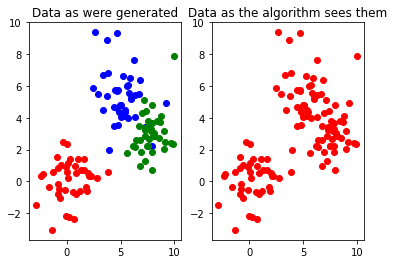

In [6]:
#Just for visualization purposes, create the labels of the 3 distributions
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as were generated')

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as the algorithm sees them')

plt.savefig("output/ch07_sample.png",dpi = 300, bbox_inches = 'tight')

In [8]:
from sklearn import cluster
K = 3

clf = cluster.KMeans(init = 'random', n_clusters = K)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

__Note__: Each clustering algorithm comes in two variants: a class, that implements the fit method to learn the clusters on train data, and a predict function, that, given test data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the labels_ attribute.

In [9]:
print(clf.labels_)    ## these are
print(clf.predict(X)) ## equivalent

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


In [11]:
print(X[(y==1).ravel(),0])
print(X[(y==1).ravel(),1])

[-0.11245493  1.61511498 -1.31656247  2.00702017 -0.86944849  2.76616109
  1.29219164  1.18121116  0.73835597  1.88851975 -0.9217586  -0.77379156
  1.6363454  -0.845281    1.79190641 -1.36215248 -0.33087227 -0.58022301
  0.05592329 -0.05741747  0.84880632 -0.79144941  0.32036423  0.1136204
  1.06575963  0.59478945  0.19479013 -1.63340513  2.22507339 -2.41732684
  0.69469578 -2.88681108  0.0795241   0.01121827  2.07604121  3.86131486
 -0.60793616 -0.16230301  0.84639252 -2.2375162 ]
[ 0.90373298  1.41037591  0.61652778  0.52935039  0.83693045  0.18338187
  0.69843735 -0.6075795   0.95900041 -0.60346033  1.50795052 -0.50951284
  0.73455554 -0.79362505 -0.37620339 -3.05610919  2.48946356  1.04245371
  2.35196738 -2.15276769  0.52150562 -0.18597881  1.42879427  0.23212923
  1.40976889 -0.64472454 -2.26493936 -0.3720942   0.36340347  0.31460312
 -2.38904223 -1.47360458  1.16263988  0.59891785  0.30519542  0.59556951
 -1.05043542 -0.55535887 -0.80936225  0.4904709 ]


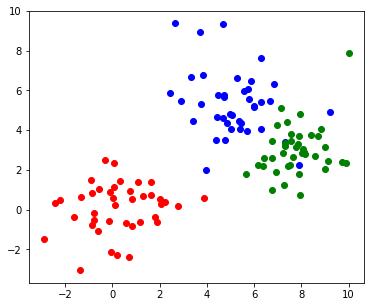

In [12]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

In [13]:
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()] 

In [15]:
Z=clf.predict(data)

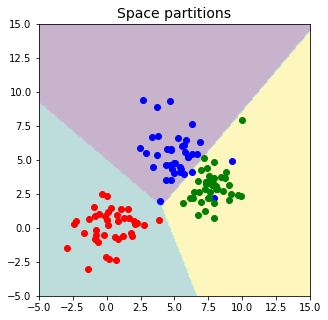

In [16]:
# Visualize space partition
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

plt.savefig("output/ch07_samples3.png",dpi = 300, bbox_inches = 'tight')

In [18]:
clf = cluster.KMeans(n_clusters = K, random_state = 0) 
    #initialize the k-means clustering
clf.fit(X) #run the k-means clustering

data = np.c_[XX.ravel(),YY.ravel()] 
Z = clf.predict(data) # returns the clustering labels of the data

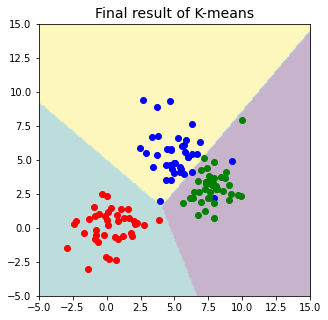

In [19]:
# visualizing true labels by colored points and space
# tesselation
plt.title('Final result of K-means', size=14)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
fig = plt.gcf()
fig.set_size_inches((6,5))

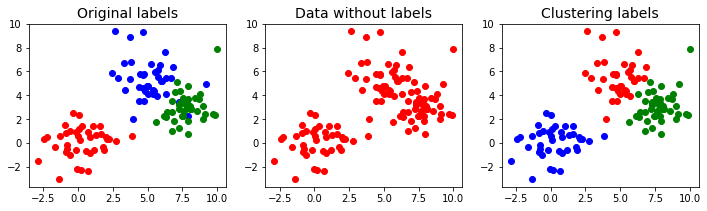

In [20]:
clf = cluster.KMeans(init='random', n_clusters=K, random_state=0) 
    #initialize the k-means clustering
clf.fit(X) #run the k-means clustering
Zx=clf.predict(X)

plt.subplot(1,3,1)
plt.title('Original labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')  # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,2)
plt.title('Data without labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r')  # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,3)
plt.title('Clustering labels', size=14)
plt.scatter(X[(Zx==1).ravel(),0],X[(Zx==1).ravel(),1],color='r')
plt.scatter(X[(Zx==2).ravel(),0],X[(Zx==2).ravel(),1],color='b')
plt.scatter(X[(Zx==0).ravel(),0],X[(Zx==0).ravel(),1],color='g')
fig = plt.gcf()
fig.set_size_inches((12,3))



The K-means algorithm clusters data by trying to separate samples in $n$ groups of equal variance. In other words, the K-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean of the samples in the cluster. The means are commonly called the cluster “centroids”.

Shall the centroids belong to the original set of points?

The K.means algorithm aims to choose centroids minimizing a criterion knows as the
__intertia__.
Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.
Several issues should be taken into account:
* Inertia makes the __assumption__ that clusters are __convex and isotropic__, (since the
    Euclidean distance is aplpied, which is isotropic with regard to the different dimensions
    of the data), which
    is not always the case. It responds poorly to elongated clusters, or manifolds
    with irregular shapes.
* Can the algorithm assure __converging__ to the global minimum? - Given enough time,
    K-means will always converge.
* This algorithm requires the __number of clusters to be specified__.
* It scaled well to alrge number of samples and has been sued across a large range of
    application areas in many different fields.

The computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='kmeans++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization.

In [27]:
from sklearn import metrics

clf = cluster.KMeans(
    n_clusters = K, init = 'k-means++', random_state = 0,
    max_iter = 300, n_init = 10
)

clf.fit(X)

print('final evlauation of the clustering: ')
print(f'inertia: {clf.inertia_:.2f}')
print(f'adjusted_rand_score: {metrics.adjusted_rand_score(y.ravel(), clf.labels_):.2f}')
print(f'homogeinity: {metrics.homogeneity_score(y.ravel(), clf.labels_):.2f}')
print(f'completeness: {metrics.completeness_score(y.ravel(), clf.labels_):.2f}')
print(f'v_measure: {metrics.v_measure_score(y.ravel(), clf.labels_):.2F}')
print(f'silhouette: {metrics.silhouette_score(X, clf.labels_, metric = "euclidean"):.2f}')

final evlauation of the clustering: 
inertia: 381.74
adjusted_rand_score: 0.90
homogeinity: 0.90
completeness: 0.90
v_measure: 0.90
silhouette: 0.54


In [28]:
from sklearn import metrics

clf = cluster.KMeans(
    n_clusters = K, init = 'random', random_state = 0,
    max_iter = 2, n_init = 2
)

clf.fit(X)

print('final evlauation of the clustering: ')
print(f'inertia: {clf.inertia_:.2f}')
print(f'adjusted_rand_score: {metrics.adjusted_rand_score(y.ravel(), clf.labels_):.2f}')
print(f'homogeinity: {metrics.homogeneity_score(y.ravel(), clf.labels_):.2f}')
print(f'completeness: {metrics.completeness_score(y.ravel(), clf.labels_):.2f}')
print(f'v_measure: {metrics.v_measure_score(y.ravel(), clf.labels_):.2F}')
print(f'silhouette: {metrics.silhouette_score(X, clf.labels_, metric = "euclidean"):.2f}')

final evlauation of the clustering: 
inertia: 382.55
adjusted_rand_score: 0.90
homogeinity: 0.90
completeness: 0.90
v_measure: 0.90
silhouette: 0.54


## __Spectral Clustering__

Up to this point, the clustering procedure has been considered as a way to find data
groups following a notion of compactness. Another way of looking at what a cluster
is is provided by connectivity (or similarity). Spectral clustering
refers to a family
of methods that use spectral techniques. Specifically, these techniques are related to
the eigendecomposition of an affinity or similarity matrix and solve the problem of
clustering according to the connectivity of the data. Let us consider an ideal similarity
matrix of two clear sets.

Let us denote the similarity matrix, $S$, as the matrix $S_{ij} = s(X_i, x_j)$ which gives the
similarity between observations $x_i$ and $x_j$. Remember that we can model similarity
using the Euclidean distance, $d(x_i, x_j) = ||x_i - x_j||^2 $, by means of a Gaussian Kernel
as follows:

$$ s(x_i, x_j) = e^{-\alpha ||x_i - x_j||^2} $$


where $\alpha$ is a parameter. We expect two points from different clusters to be far away
from each other. However, if there is a sequence of points within the cluster thar forms
a "path" between them, this also would lead to big distance among some of the points
from the same cluster. Hence, we define an affinity matrix $A$ based on the similarity
matrix $S$, where $A$ contains positive values and is symmetric. This can be done, dof example,
bu applying a k-nearest neighbor that builds a graph connecting just the $k$ closest
datapoints.
The symmetry comes from the fact that A ij and A ji give the
distance between the same points. Considering the affinity matrix, the clustering can
be seen as a graph partition problem, where connected graph components correspond
to clusters. The graph obtained by spectral clustering will be partitioned so that graph
edges connecting different clusters have low weights, and vice versa. Furthermore,
we define a degree matrix D, where each diagonal value is the degree of the respective
graph node and all other elements are 0. Finally, we can compute the unnormalized
graph Laplacian ($U = D − A$) and/or a normalized version of the Laplacian ($L$), as
follows:

* _Simple Laplacian_: $L = I - D^{-1}A$, which corresponds to a random walk, being
    $D^{-1}$ the transition matrix. Spectral clustering obtains groups of nodes such
    that the random walk corresponds to seldom transitions from one group to another.
* _Normalized Laplacian_: $L = D^{-\frac{1}{2}} U D^{-\frac{1}{2}} $
* _Generalized Laplacian_: $L = D^{-1} U $

If we assume that there are $k$ clusters, the next step is to find the $k$ small-
est eigenvectors, without considering the trivial constant eigenvector. Each row of
the matrix formed by the $k$ smallest eigenvectors of the Laplacian matrix defines
a transformation of the data $x_i$ . Thus, in this transformed space, we can apply
K-means clustering in order to find the final clusters. If we do not know in advance
the number of clusters, $k$, we can look for sudden changes in the sorted eigenvalues
of the matrix, $U$ , and keep the smallest ones.

Let's illustrate this

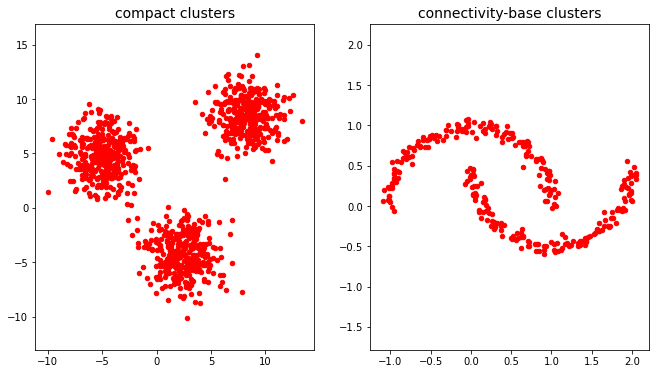

In [30]:
from sklearn.datasets.samples_generator import make_blobs, make_moons

X, labels_true = make_blobs(n_samples = 1000, centers = 3, cluster_std = [1.7, 1.7, 1.7])

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c = 'r', marker = 'o', s = 20)
plt.axis('equal')
plt.title('compact clusters', size = 14)

[Xmoons, ymoons] = make_moons(n_samples = 300, noise = 0.05)
plt.subplot(1, 2, 2)
plt.scatter(Xmoons[:, 0], Xmoons[:, 1], c = 'r', marker = 'o', s = 20)
plt.axis('equal')
plt.title('connectivity-base clusters', size = 14)

fig = plt.gcf()
fig.set_size_inches((11, 6))

In [32]:
# apply spectral clustering
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import euclidean_distances

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(Xmoons)

# compute distances
distances = euclidean_distances(Xmoons)

spectral = cluster.SpectralClustering(
    n_clusters = 2, affinity = 'nearest_neighbors'
)

spectral.fit(Xmoons)

y_pred = spectral.labels_.astype(np.int)

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


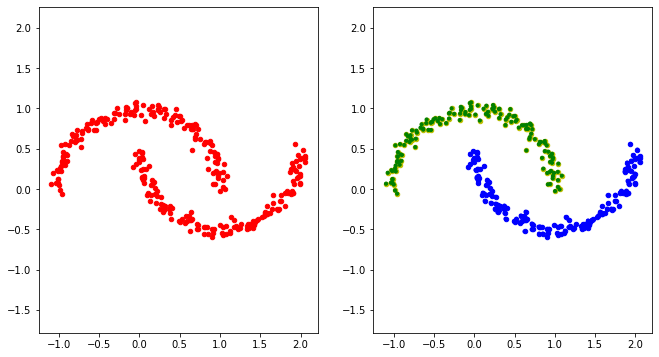

In [36]:
# Following, we visualize the spectral clustering results:
plt.subplot(1,2,1)
plt.scatter(Xmoons[:, 0], Xmoons[:, 1], c = 'r', marker = 'o', s = 20) 
plt.axis('equal')
 
plt.subplot(1,2,2)
plt.scatter(Xmoons[y_pred == 0, 0], Xmoons[y_pred == 0, 1], c = 'b', marker = 'o',s = 20) 
plt.scatter(Xmoons[y_pred == 1, 0], Xmoons[y_pred == 1, 1], c = 'y', marker = 'o',s = 20) 
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches((11,6))
plt.scatter(Xmoons[:, 0], Xmoons[:, 1], color = colors[y_pred].tolist(), s = 10)

plt.show()

Let us compare the result to the K-means:

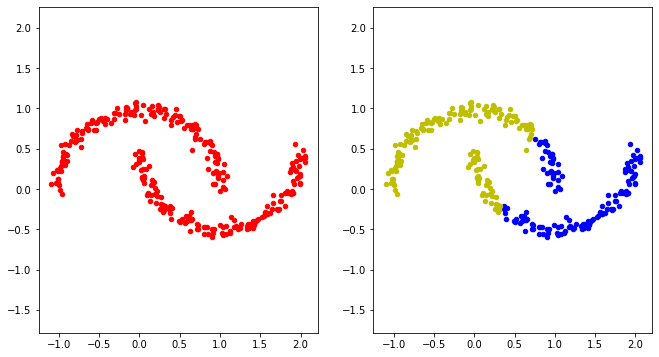

In [37]:
plt.subplot(1,2,1)
plt.scatter(Xmoons[:, 0], Xmoons[:, 1], c='r', marker='o',s=20) 
plt.axis('equal')
 
# Cluster using k-means
clf = cluster.KMeans(n_clusters=2,init='k-means++')
clf.fit(Xmoons)
y_pred=clf.predict(Xmoons)
 
# Visualize k-means result
plt.subplot(1,2,2)
plt.scatter(Xmoons[y_pred==0, 0], Xmoons[y_pred==0, 1], c='b', marker='o',s=20) 
plt.scatter(Xmoons[y_pred==1, 0], Xmoons[y_pred==1, 1], c='y', marker='o',s=20) 
plt.axis('equal')
fig=plt.gcf()
fig.set_size_inches((11,6))



Note that since K-means looks for spheric clusters, it is unable to separate the two moon data, in contrast to the spectral clustering.


Observations:
* In most of the cases, the clustering is performed on the __graph Laplacian matrix__ ($L = D - A$),
    where $D$ is the __degree matrix__ (a diagonal matrix where each element $d_{i, j}$ counts
    the number of edges the node has) and the role of the similarity matrix is now given
    by the __affinity matrix__ ($A$).
* Because the Laplacian is related to $-A$, isntrad of computing the second larger eigenvector,
    the second smaller eigenvector is checked.